# Exploration of Structure-Aware Line Segment Classification

[Link to the slides](https://docs.google.com/presentation/d/1a_c7ad2dueD3v1S-io3ree2PZ7l1lJwAjxdZ9Dhj0NY/edit#slide=id.g1bb67da435b_0_13)

### Imports

In [1]:
#install PIL
%pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

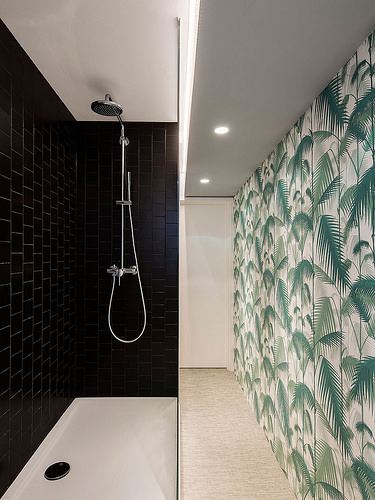

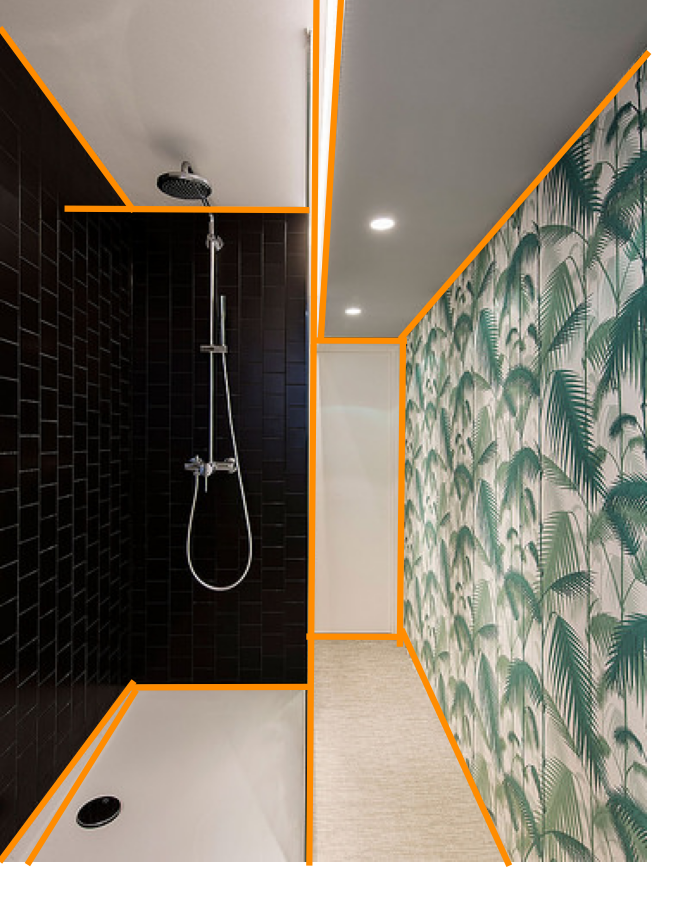

In [3]:
from IPython.display import display
from PIL import Image
demo_img = Image.open('demo/demo.png')
letr_result = Image.open('demo/demo_letr_result.png')
display(demo_img)
display(letr_result)
images = [] # list of images we use as input
images.append(demo_img)

#### Preprocessing

In [21]:
#resize images
input_dimension_x = 512
input_dimension_y = 512
for image in images:
    image = letr_result.resize((input_dimension_x, input_dimension_y), Image.ANTIALIAS) #antialiasing to avoid pixelation


### Models 

In [27]:
#simple cnn classification
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax')) #softmax for classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 flatten_3 (Flatten)         (None, 984064)           

In [28]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy', 'f1_score'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

#### Stacking LSD with LETR models -> allows for textural classification as well
#### Using new model using LETR for creating the dataset.

In [ ]:
#Using the Wireframe dataset (that already has structural lines detected) LETR for structural line detection. 